# Pronóstico de ventas para productos Agroindustriales 


Equipo de trabajo
*  Maribel Medina Arboleda
*  Manuel Alberto Peñafiel Mendoza
*  Carlos Alberto Lenguerque Moreno

Estadística Multivariada Avanzada

Escuela de Administración, Escuela de Ingeniería, Escuela de Humanidades, Escuela de Economía y Finanzas, Escuela de Ciencias, Universidad Eafit
Diciembre de 2021



CARGA DE INFORMACIÓN Y DE LIBRERÍAS NECESARIAS PARA CORRER EL MODELO


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imblearn
!pip install sktime
from sklearn.metrics import accuracy_score, f1_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
plt.style.use('bmh')
import statsmodels.api as sm

# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 150)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

path_py_file = r'/content/'
dir = os.path.dirname(path_py_file)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(dir + '/Datosall.csv' , encoding='latin-1')
df.AnoMes = pd.to_datetime(df .AnoMes, format='%Y%m', errors='coerce')

     |████████████████████████████████| 6.1 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 14.5 MB/s 
     |████████████████████████████████| 3.3 MB 44.4 MB/s 
     |████████████████████████████████| 26.3 MB 1.4 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.8.1 requires statsmodels>=0.12.1, but you have statsmodels 0.10.2 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Datosall.csv to Datosall.csv


GENERACIÓN DE UNA VISIÓN GLOBAL DE LAS VARIABLES MOSTRANDO LOS PRIMEROS CINCO CAMBOS DEL CONJUNTO DE DATOS.

In [2]:
df.head()

,AnoMes,sk_vendedor,Division,Subdivision,Producto,Ventas,Stock
0,2015-01-01,96,DIVISION FUMIGACION,FUMIGADORA DE MEMBRANA,29914,0,2
1,2015-01-01,96,DIVISION FUMIGACION,FUMIGADORA DE MEMBRANA,21792,0,5
2,2015-01-01,96,DIVISION FUMIGACION,FUMIGADORA DE MEMBRANA,27199,0,1
3,2015-01-01,96,DIVISION FUMIGACION,FUMIGADORA DE MEMBRANA,21794,0,4
4,2015-01-01,96,DIVISION FUMIGACION,FUMIGADORA DE MEMBRANA,21793,0,5


CARGA DE UN INFORME GLOBAL DE LOS DATOS PARA CONOCER SI HAY VALORES NULOS, QUÉ DISTRIBUCIÓN TIENEN Y ALGUNAS OTRAS CUALIDADES BÁSICAS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111340 entries, 0 to 111339
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   AnoMes       111340 non-null  datetime64[ns]
 1   sk_vendedor  111340 non-null  int64         
 2   Division     111340 non-null  object        
 3   Subdivision  111340 non-null  object        
 4   Producto     111340 non-null  int64         
 5   Ventas       111340 non-null  int64         
 6   Stock        111340 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.9+ MB


VALIDO CON UNA PRUEBA DE ERROR SI HAY NA EN LA TABLA, ESTO PARA RECONOCER QUE NO EXISTEN VALORES NULOS QUE PUEDAN GENERAR ERRORES A LA HORA DE HACER EL PROCESADO.

In [4]:
df.isna()

,AnoMes,sk_vendedor,Division,Subdivision,Producto,Ventas,Stock
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
111335,False,False,False,False,False,False,False
111336,False,False,False,False,False,False,False
111337,False,False,False,False,False,False,False
111338,False,False,False,False,False,False,False


UNIFICO LAS FUNCIONES ANTERIORES PARA HACERLAS FÁCIL DE VALIDAR.

In [5]:
df.shape
# checking the head of the data

df.head()
# describing the data

df.describe()
# checking if there are any null values

df.isnull().sum()
#Dropping tempo column

AnoMes         0
sk_vendedor    0
Division       0
Subdivision    0
Producto       0
Ventas         0
Stock          0
dtype: int64

https://ricovictor.com/index.php/2021/06/29/test-de-dickey-fuller-aumentado-en-r/

AGRUPAMIENTO PARA VENTAS

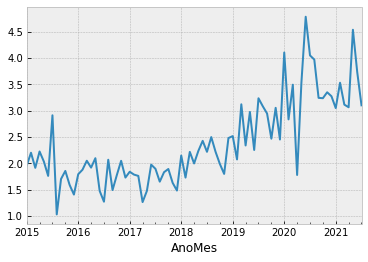

In [6]:
# data = data.set_index('AnoMes')
df1 = df.set_index('AnoMes')
df1 = df1.Ventas.copy()
df1.index = pd.to_datetime(df1.index)
df1_ventas_mean = df1.groupby(["AnoMes"]).mean()
df1_ventas_sum = df1.groupby(["AnoMes"]).sum()
# df1_ventas_agrupado = df.groupby(["Producto"])["Ventas"].sum()
df1_ventas_mean.plot()

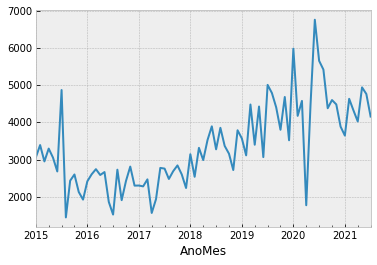

In [7]:
df1_ventas_sum.plot()

AGRUPAMIENTO PARA STOCK



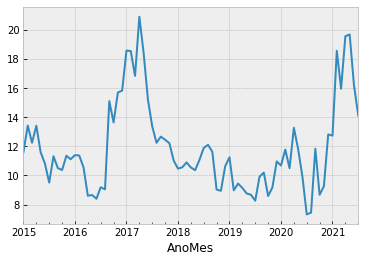

In [8]:
# data = data.set_index('AnoMes')
df2 = df.set_index('AnoMes')
df2 = df2.Stock.copy()
df2.index = pd.to_datetime(df2.index)
df2_stock_mean = df2.groupby(["AnoMes"]).mean()
df2_stock_sum = df2.groupby(["AnoMes"]).sum()
df2_stock_mean.plot()

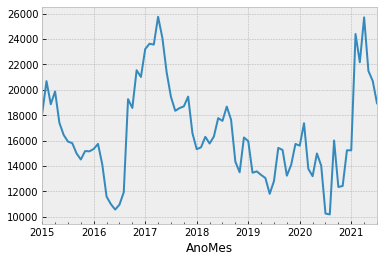

In [9]:
df2_stock_sum.plot()

NORMALIZACIÓN DE LOS DATOS, PARA CENTRALIZARLOS Y GENERALIZAR EL PROBLEMA A REALIZAR, ES UNA PRÁCTICA NECESARIA A NIVEL ESTADÍSTICO PARA GARANTIZAR QUE SE ESTÁN ANALIZANDO LOS CONJUNTOS DE DATOS EN UN RANGO QUE PERMITA A LOS MODELOS SER MUCHO MÁS ESPECÍFICOS Y PRECISOS.

In [10]:
df1_ventas_mean = (df1_ventas_mean - df1_ventas_mean.min())/(df1_ventas_mean.max() - df1_ventas_mean.min())
print(df1_ventas_mean)
df2_stock_mean = (df2_stock_mean - df2_stock_mean.min())/(df2_stock_mean.max() - df2_stock_mean.min())
print(df2_stock_mean)

AnoMes
2015-01-01    0.246561
2015-02-01    0.312033
2015-03-01    0.235645
2015-04-01    0.318315
2015-05-01    0.267406
                ...   
2021-03-01    0.555430
2021-04-01    0.542139
2021-05-01    0.934136
2021-06-01    0.720606
2021-07-01    0.551941
Name: Ventas, Length: 79, dtype: float64
AnoMes
2015-01-01    0.315383
2015-02-01    0.449674
2015-03-01    0.362488
2015-04-01    0.448660
2015-05-01    0.315105
                ...   
2021-03-01    0.636038
2021-04-01    0.901404
2021-05-01    0.910371
2021-06-01    0.654433
2021-07-01    0.500495
Name: Stock, Length: 79, dtype: float64


INVOCO UNA NUEVA LIBRERÍA LLAMADA STATSMODELS CON LA CUAL HAGO USO DE UNA PRUEBA ESTADÍSTICA LLAMADA TEST DE DICKEY-FULLER, GARANTIZANDO CONOCER LA ESTACIONALIDAD O NO DE LOS DATOS

In [11]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1_ventas_mean.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.146111
p-value: 0.944648


PUEDE OBSERVARSE QUE ESTOS DATOS PARA EL CASO DE LAS VENTAS, TIENEN UNA TENDENCIA A NO SER ESTACIONARIOS, NO OBSTANTE USANDO MEDIAS MÓVILES ES MUY PROBABLE QUE SEA POSIBLE DEFINIR UNA MÉTRICA ADECUADA DE TRABAJO BAJO MEDIAS MÓVILES Y BUSCAR QUE SEAN ESTACIONARIOS, PARA ESTO USAREMOS UN MODELO DE PREDICCIÓN CON BÚSQUEDA DE HIPERPARÁMETROS POSTERIORMENTE 

REALIZO TEST DE DICKEY-FULLER PARA LA VARIABLE STOCK, BUSCANDO CONOCER SU GRADO DE ESTACIONARIEDAD. OBTENEMOS QUE ES MUY SIMILAR AL DE LA VARIABLE VENTAS.

In [12]:
result = adfuller(df2_stock_mean.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.611222
p-value: 0.090700


Instalación del paquete con el que realizaremos la predicción y pronóstico de la serie de tiempo

In [13]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.8.1 requires statsmodels<=0.12.1, but you have statsmodels 0.13.1 which is incompatible.


In [14]:
from pmdarima.arima.utils import ndiffs
y = df1_ventas_mean

## Adf Test 
ndiffs(y, test='adf')  # 2

1

In [15]:

# KPSS test Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests
ndiffs(y, test='kpss')  # 0



1

In [16]:
# PP test: Phillips–Perron test
ndiffs(y, test='pp')  # 2

0

RECARGAMOS LA SEÑAL CON SU COMPONENTE NEGATIVO PARA OBSERVAR DE NUEVO SU ESTACIONARIEDAD.


# MODELO ARIMA

INICIAMOS EL CÁLCULO Y MODELADO DEL MODELO, BASADO EN UNA ARIMA, AQUÍ CONOCEREMOS LA SEÑAL Y BUSCAREMOS ENTENDER SU FUNCIONAMIENTO TEMPORO ESPACIAL. DESPUÉS DE ESTO DEFINIMOS QUÉ PASOS SEGUIR PARA MEJORAR EL MODELADO DE LA MISMA SEÑAL.

ARIMA VENTAS

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

warnings.filterwarnings("ignore")
# 1,1,2 ARIMA Model p: El número de pausas dentro de la señal, valor de observación del modelo, d: El número de veces de observaciones, q: El tamaño de las ventanas de las medias móviles
model = sm.tsa.statespace.SARIMAX(df1_ventas_mean, order=(1,1,2))
model_fit_1_1_2_ventas = model.fit(disp=False, maxiter=250)
print(model_fit_1_1_2_ventas.summary())

                           Statespace Model Results                           
Dep. Variable:                 Ventas   No. Observations:                   79
Model:               SARIMAX(1, 1, 2)   Log Likelihood                  47.746
Date:                Tue, 07 Dec 2021   AIC                            -87.493
Time:                        20:47:03   BIC                            -78.066
Sample:                    01-01-2015   HQIC                           -83.719
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      0.044    -22.941      0.000      -1.085      -0.914
ma.L1          0.2413      0.573      0.421      0.673      -0.881       1.363
ma.L2         -0.7540      0.469     -1.608      0.1

In [18]:
import statsmodels.api as sm

model_AR = sm.tsa.ARIMA(df1_ventas_mean, order=(1,1,2))
model_fit_1_1_2_ventas_AR = model_AR.fit()
print(model_fit_1_1_2_ventas_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Ventas   No. Observations:                   78
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  49.125
Method:                       css-mle   S.D. of innovations              0.127
Date:                Tue, 07 Dec 2021   AIC                            -88.250
Time:                        20:47:06   BIC                            -76.467
Sample:                    02-01-2015   HQIC                           -83.533
                         - 07-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0057      0.003      1.932      0.057   -8.13e-05       0.011
ar.L1.D.Ventas    -1.0000        nan        nan        nan         nan         nan
ma.L1.D.Ventas     0.1935        nan

ES VISIBLE QUE EL MODELO REALIZÓ EL ENTRENAMIENTO Y NOS ENTREGA MÉTRICAS CON LAS QUE PODEMOS REVISAR LITERATURA Y VALIDAR SU FUNCIONAMIENTO

ARIMA STOCK

In [19]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

warnings.filterwarnings("ignore")
# 1,1,2 ARIMA Model p: El número de pausas dentro de la señal, valor de observación del modelo, d: El número de veces de observaciones, q: El tamaño de las ventanas de las medias móviles
model = sm.tsa.statespace.SARIMAX(df2_stock_mean, order=(1,1,2))
model_fit_1_1_2_stock = model.fit(disp=False, maxiter=250)
print(model_fit_1_1_2_stock.summary())

                           Statespace Model Results                           
Dep. Variable:                  Stock   No. Observations:                   79
Model:               SARIMAX(1, 1, 2)   Log Likelihood                  44.905
Date:                Tue, 07 Dec 2021   AIC                            -81.810
Time:                        20:47:09   BIC                            -72.384
Sample:                    01-01-2015   HQIC                           -78.037
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2445      1.451      0.168      0.866      -2.600       3.089
ma.L1         -0.4324      1.399     -0.309      0.757      -3.174       2.309
ma.L2          0.1296      0.233      0.556      0.5

AHORA HAREMOS EL ENTRENAMIENTO DE LA ARIMA CON OTROS HIPERPARÁMETROS, ESTOS PERMITEN CONOCER O REALIZAR EL MUESTREO DE LA SEÑAL DESDE OTRA PERSPECTIVA Y ASÍ VISUALIZAR SU CARACTERÍSTICA O SIMPLEMENTE ASEGURAR LA ESTACIONALIDAD CON LA QUE FUNCIONA.

In [20]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

warnings.filterwarnings("ignore")
# 1,1,1 ARIMA Model
model = sm.tsa.statespace.SARIMAX(df1_ventas_mean, order=(1,1,1))
model_fit_1_1_1_ventas = model.fit(disp=False, maxiter=250)
print(model_fit_1_1_1_ventas.summary())

                           Statespace Model Results                           
Dep. Variable:                 Ventas   No. Observations:                   79
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  47.253
Date:                Tue, 07 Dec 2021   AIC                            -88.505
Time:                        20:47:12   BIC                            -81.435
Sample:                    01-01-2015   HQIC                           -85.675
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0920      0.124     -0.744      0.457      -0.334       0.150
ma.L1         -0.7328      0.107     -6.877      0.000      -0.942      -0.524
sigma2         0.0172      0.002      9.154      0.0

ARIMA MODEL CON PARÁMETROS EN 1,1,1 para la variable Stock

In [21]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

warnings.filterwarnings("ignore")
# 1,1,1 ARIMA Model
model = sm.tsa.statespace.SARIMAX(df2_stock_mean, order=(1,1,1))
model_fit_1_1_1_stock = model.fit(disp=False, maxiter=250)
print(model_fit_1_1_1_stock.summary())

                           Statespace Model Results                           
Dep. Variable:                  Stock   No. Observations:                   79
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  44.855
Date:                Tue, 07 Dec 2021   AIC                            -83.709
Time:                        20:47:15   BIC                            -76.639
Sample:                    01-01-2015   HQIC                           -80.879
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3388      0.395     -0.857      0.392      -1.114       0.436
ma.L1          0.1504      0.434      0.347      0.729      -0.700       1.001
sigma2         0.0185      0.002      8.293      0.0

PLOT DE LOS RESIDUOS O RESULTADOS OBTENIDOS EN LA PREDICCIÓN Y SU DISTRIBUCIÓN PARA LA ARIMA 1,1,2 DE VENTAS

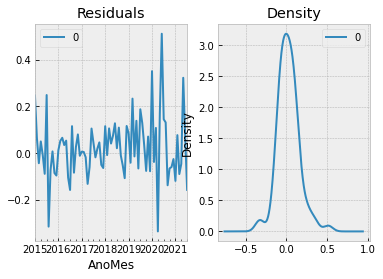

In [22]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_1_1_2_ventas.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

PLOT DE LOS RESIDUOS O RESULTADOS OBTENIDOS EN LA PREDICCIÓN Y SU DISTRIBUCIÓN PARA LA ARIMA 1,1,2 DE **STOCK**

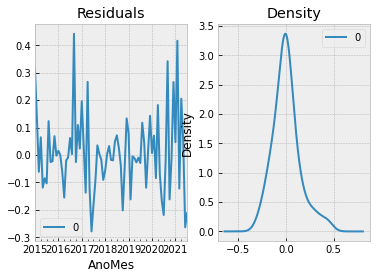

In [23]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_1_1_2_stock.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

PLOT DE LOS RESIDUOS O RESULTADOS OBTENIDOS EN LA PREDICCIÓN Y SU DISTRIBUCIÓN PARA LA ARIMA 1,1,1 DE **VENTAS**

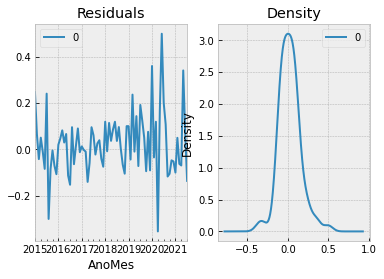

In [24]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_1_1_1_ventas.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

PLOT DE LOS RESIDUOS O RESULTADOS OBTENIDOS EN LA PREDICCIÓN Y SU DISTRIBUCIÓN PARA LA ARIMA 1,1,1 DE **STOCK**


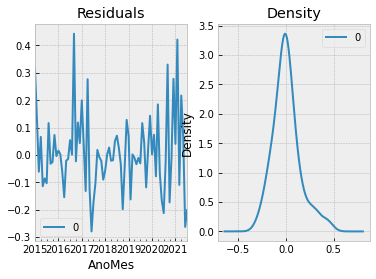

In [25]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_1_1_1_stock.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Realizo una comparación entre el modelo actual y el modelo ajustado para el caso de ventas y construyo una gráfica que representa este procedimiento de modelamiento en el tiempo y espacio. Reconociendo visualmente el nivel de ajuste del modelo.

In [26]:
!pip install statsmodels --upgrade


In [27]:
# 1,1,1 ARIMA Model
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(df2_stock_mean, order=(1,1,1))
model_fit_1_1_1_stock_mean = model.fit(disp=0)
print(model_fit_1_1_1_stock_mean.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Stock   No. Observations:                   78
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  44.870
Method:                       css-mle   S.D. of innovations              0.136
Date:                Tue, 07 Dec 2021   AIC                            -81.740
Time:                        20:47:34   BIC                            -72.313
Sample:                    02-01-2015   HQIC                           -77.966
                         - 07-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.013      0.175      0.862      -0.024       0.028
ar.L1.D.Stock    -0.3404      0.455     -0.748      0.457      -1.232       0.551
ma.L1.D.Stock     0.1518      0.476     

MODELO VENTAS 1,0,1

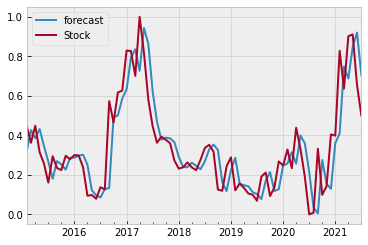

In [28]:
# Actual vs Fitted
model_fit_1_1_1_stock_mean.plot_predict(dynamic=False)
plt.show()

In [29]:
# 1,1,1 ARIMA Model
model = ARIMA(df1_ventas_mean, order=(4,2,1))
model_fit_1_1_1_ventas_mean = model.fit(disp=0)
print(model_fit_1_1_1_ventas_mean.summary())

                             ARIMA Model Results                              
Dep. Variable:              D2.Ventas   No. Observations:                   77
Model:                 ARIMA(4, 2, 1)   Log Likelihood                  43.626
Method:                       css-mle   S.D. of innovations              0.131
Date:                Tue, 07 Dec 2021   AIC                            -73.252
Time:                        20:47:52   BIC                            -56.845
Sample:                    03-01-2015   HQIC                           -66.689
                         - 07-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.000      1.017      0.313      -0.000       0.001
ar.L1.D2.Ventas    -0.7934      0.112     -7.069      0.000      -1.013      -0.573
ar.L2.D2.Ventas    -0.5296      

<Figure size 3200x1920 with 0 Axes>

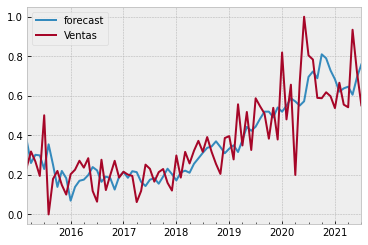

In [30]:
# Actual vs Fitted
plt.figure(figsize=(40,24),dpi=80)
model_fit_1_1_1_ventas_mean.plot_predict(dynamic=False)
plt.show()

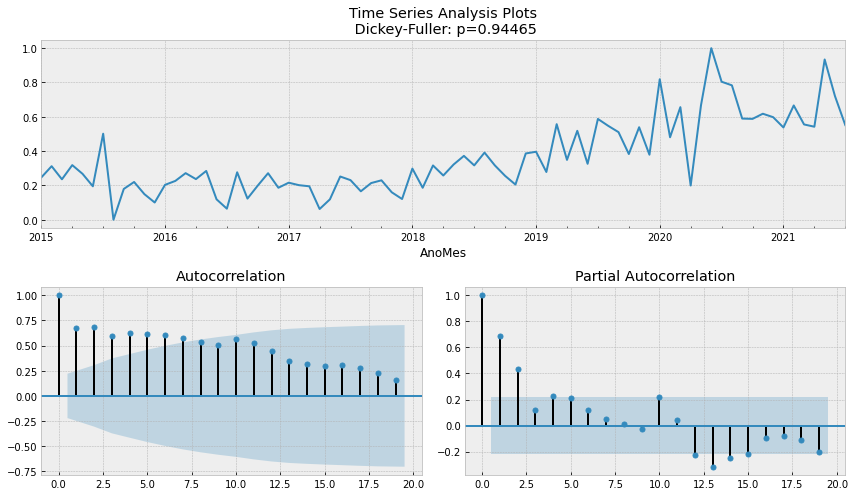

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

# adapted from https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python?scriptVersionId=50985180&cellId=80
def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
           
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
    
tsplot(df1_ventas_mean)

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26] TEST: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52] TEST: [53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78]


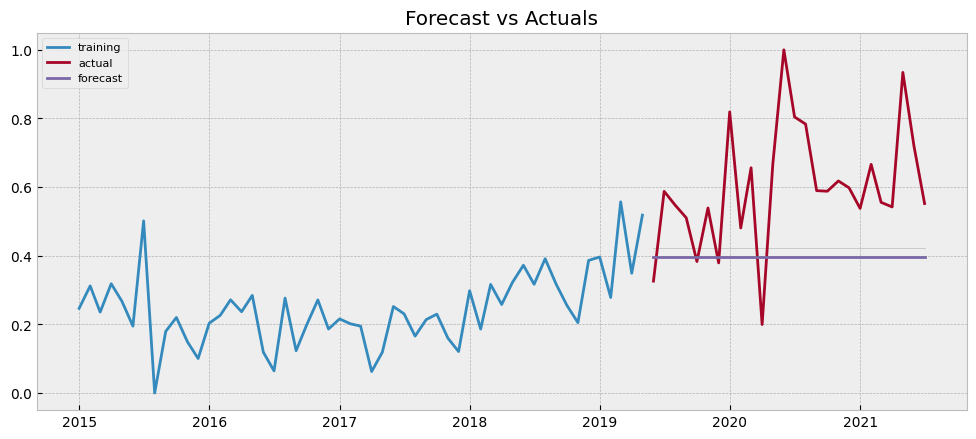

In [32]:
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import TimeSeriesSplit
# Create Training and Test
# train = pd.DataFrame(df1_ventas_mean[:40],columns=['AnoMes','Ventas'])
# test = pd.DataFrame(df1_ventas_mean[41:],columns=['AnoMes','Ventas'])
n_samples = len(df1_ventas_mean)
n_splits = 2
tscv = TimeSeriesSplit(n_splits=n_splits,test_size= n_samples // (n_splits + 1))

for train_index, test_index in tscv.split(df1_ventas_mean):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df1_ventas_mean[train_index], df1_ventas_mean[test_index]
    y_train, y_test = df1_ventas_mean[train_index], df1_ventas_mean[test_index]

# df = df.reset_index('AnoMes')
# train = train.set_index('AnoMes')
# test = test.set_index('AnoMes')
# Build Model
# model = ARIMA(train.Ventas, order=(3,2,1))  
model = sm.tsa.statespace.SARIMAX(X_train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=X_test.index)
lower_series = pd.Series(conf, index=X_test.index)
upper_series = pd.Series(conf, index=X_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(X_train, label='training')
plt.plot(X_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [33]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
# df = df.set_index('AnoMes')
# Evalúo la señal usando el AIC que es el criterio de información de Akaike que es un estimador de error
# de la predicción de forma teórica, se usa como una medida de calidad estadística.

model = pm.auto_arima(X_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-89.550, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-60.237, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-81.201, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-89.271, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-62.154, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-87.993, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-87.568, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-89.269, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-89.744, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-87.958, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-87.128, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-91.307, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-83.046, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-89.488, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-89.5

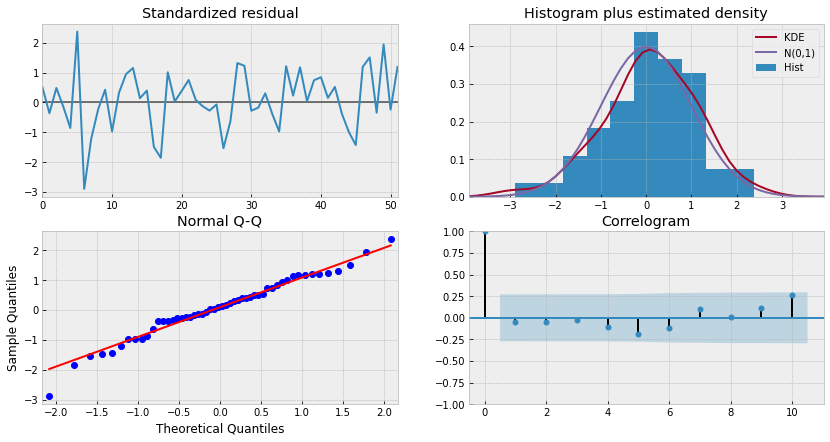

In [34]:
model.plot_diagnostics(figsize=(14,7))
plt.show()

In [35]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-SARIMA
smodel = pm.auto_arima(X_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-46.151, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-21.196, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-41.015, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-47.026, Time=0.35 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-43.214, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-46.034, Time=0.72 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-48.012, Time=0.37 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-46.040, Time=1.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-44.163, Time=2.40 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-28.902, Time=0.14 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-46.729, Time=0.43 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=-46.735, Time=0.36 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=-44.756, Time=0.67 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   53
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 12)   Log Likelihood                  27.006
Date:                            Tue, 07 Dec 2021   AIC                            -48.012
Time:                                    20:48:44   BIC                            -42.945
Sample:                                         0   HQIC                           -46.180
                                             - 53                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7605      0.138     -5.512      0.000      -1.031      -0.490
ar.S.L12      -0.5040      0.184     -2.738      0.006      -0.865      -0.143
sigma2         0.0136      0.004      3.694      0.000       0.006       0.021
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 9.86
Prob(Q):                               nan   Prob(JB):                         0.01
Heteroskedasticity (H):               0.47   Skew:                            -0.28
Prob(H) (two-sided):                  0.19   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = smodel
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in X_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(X_test, forecasts)}")
print(f"SMAPE: {smape(X_test, forecasts)}")

Mean squared error: 0.034268975791250315
SMAPE: 24.13755297772951


In [37]:
# 1,1,1 ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(df1_ventas_mean, order=(0,1,0))
model_fit_1_1_1_ventas_mean = model.fit(disp=0)
print(model_fit_1_1_1_ventas_mean.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Ventas   No. Observations:                   78
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  27.181
Method:                           css   S.D. of innovations              0.171
Date:                Tue, 07 Dec 2021   AIC                            -50.363
Time:                        20:49:17   BIC                            -45.649
Sample:                    02-01-2015   HQIC                           -48.476
                         - 07-01-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.019      0.202      0.840      -0.034       0.042


<Figure size 2160x1332 with 0 Axes>

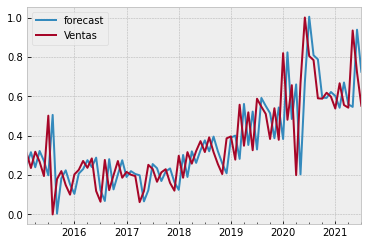

In [38]:
# Actual vs Fitted
fig = plt.gcf()
fig.set_size_inches(30, 18.5)
model_fit_1_1_1_ventas_mean.plot_predict(dynamic=False)
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

# model_fit_1_1_1_ventas_mean.mse()

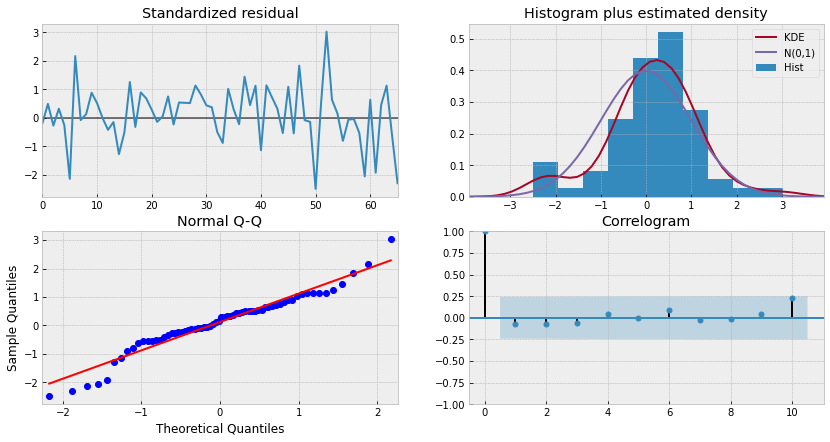

In [40]:
smodel.plot_diagnostics(figsize=(14,7))
plt.show()

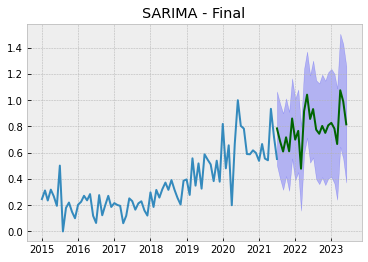

In [41]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(X_test.index[-1], periods = n_periods, freq='MS')
fitted_p = smodel.predict_in_sample(X_test)
index_of_fc_p = pd.date_range(X_test.index[-1], periods = 79, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# fitted_series_p = pd.Series(fitted_p, index=index_of_fc_p)


# Plot
plt.plot(df1_ventas_mean)
# plt.plot(fitted_series_p, color='rosybrown')
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='b', alpha=.25)

plt.title("SARIMA - Final")
plt.show()

# MODELO # 3  SVR - PSO


Lectura Librerías para inicializar análisis

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D

Se conecta google colab con los modos de carga de datos para facilitar la subida y bajada de archivos.
Selecciones el archivo a utilizar

In [45]:
from google.colab import files
uploaded = files.upload()

Saving Datosall.csv to Datosall (1).csv


In [46]:
import io
import os
import sys
import pandas as pd

path_py_file = r'/content/'
dir = os.path.dirname(path_py_file)
data = pd.read_csv(dir + '/Datosall.csv' , encoding='latin-1')
data.AnoMes = pd.to_datetime(data.AnoMes, format='%Y%m', errors='coerce')

Graficamos la información a analizar, para visualizar su funcionamiento

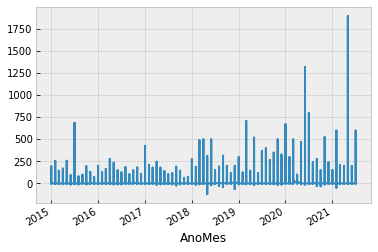

In [47]:
data = data.set_index('AnoMes')
data.Ventas.plot()

Agrupo los valores por medias y por sumatoria de valores, comprobando cuál medida de tendencia es más objetiva según lo visto en los datos


In [48]:
# data = data.set_index('AnoMes')
data.index = pd.to_datetime(data.index)
data_ventas_mean = data.groupby(["AnoMes"])['Ventas'].mean()
data_ventas_sum = data.groupby(["AnoMes"])['Ventas'].sum()
# data_ventas_hierarchical = data.groupby(["AnoMes","Division"])['Ventas'].max()

Grafico el promedio y la sumatoria

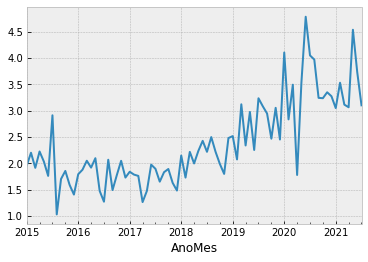

In [49]:
data_ventas_mean.plot()

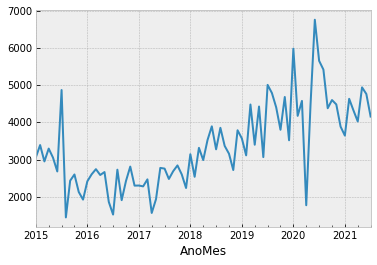

In [50]:
data_ventas_sum.plot()

Normalizamos la información, haciendo uso de una simple ecuación de distribución entre 0 y 1, esto permite hacer un análisis más objetivo y reducir el sesgo del modelo a la hora de entrenarse.

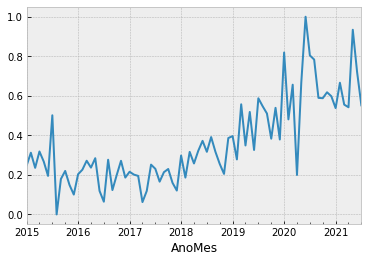

In [51]:
#Normalizing the data

data_nv = data_ventas_mean.copy()
data_nv = (data_ventas_mean - data_ventas_mean.min())/(data_ventas_mean.max() - data_ventas_mean.min())
data_nv.plot()

In [52]:
# TO DO: Crear una función para el Lag utilizado para la predicción
# Usaremos 12 para la dimensión del lag si la serie se repite 
# anualmente, 3 si es trimestral, etc.

dimensions = 1
data_cnv = pd.concat([data_nv.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cnv)

              Ventas    Ventas
AnoMes                        
2015-01-01  0.246561       NaN
2015-02-01  0.312033  0.246561
2015-03-01  0.235645  0.312033
2015-04-01  0.318315  0.235645
2015-05-01  0.267406  0.318315
...              ...       ...
2021-03-01  0.555430  0.666176
2021-04-01  0.542139  0.555430
2021-05-01  0.934136  0.542139
2021-06-01  0.720606  0.934136
2021-07-01  0.551941  0.720606

[79 rows x 2 columns]


Se particiona la información en entrenamiento y prueba

In [56]:
# Splitting the data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cnv.iloc[1:,1:]

y = data_cnv.iloc[1:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.8, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))

6
26
46


Creamos una función para hacer la optimización por enjambre de partículas.

La optimización por enjambre de partículas es una técnica de optimización bioinspirada en cómo funcionan los enjambres de abejas, esta utiliza una actualización temporal, espacial y de aceleración, que le permite al modelo reconocer en qué posición se encuentran las partículas del modelo y hacia donde se intentará realizar la minimización del mismo y lograr un valor donde converjan todas las partículas. Es muy eficaz para realizar este tipo de análisis por su versatilidad y capacidad de adaptarse a la información en todo momento.

In [57]:
def pso(n_particles, iterations, dimensions, inertia):

    # Range of SVR's hyperparameters (Particle's search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    
    # Initializing particles' positions randomly, inside
    # the search space
    x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
    y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
    z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

    c = np.concatenate((x,y,z), axis=1)

    # Initializing particles' parameters
    v = np.zeros((n_particles, dimensions))
    c1 = 2
    c2 = 2
    p_best = np.zeros((n_particles, dimensions))
    p_best_val = np.zeros(n_particles) + sys.maxsize  
    g_best = np.zeros(dimensions)
    g_best_val = sys.maxsize

    best_iter = np.zeros(iterations)

    # Initializing regression variables
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    
    # Displaying tridimensional search space
    plot(c)

    from sklearn.metrics import mean_squared_error
    
    for i in range(iterations):

        for j in range(n_particles):
          # Starting Regression
          rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

          # Fitting the curve
          rgs.fit(X_train, y_train)
          y_predict = rgs.predict(X_val)

          # Using Mean Squared Error to verify prediction accuracy
          mse = mean_squared_error(y_val, y_predict) 

          # If mse value for that search point, for that particle,
          # is less than its personal best point,
          # replace personal best
          if(mse < p_best_val[j]):   # mse < p_best_val[j]
              # The value below represents the current least Mean Squared Error
              p_best_val[j] = mse
              
              p_best_RGS[j] = rgs
                           

              # The value below represents the current search coordinates for
              # the particle's current least Mean Squared Error found
              p_best[j] = c[j].copy()
              
          # Using auxiliar variable to get the index of the
          # particle that found the configuration with the 
          # minimum MSE value
          aux = np.argmin(p_best_val)        
        
          if(p_best_val[aux] < g_best_val):
              # Assigning Particle's current best MSE to the Group's best    
              g_best_val = p_best_val[aux]

              # Assigning Particle's current best configuration to the Group's best
              g_best = p_best[aux].copy()

              # Group best regressor:
              # the combination of C, Epsilon and Gamma
              # that computes the best fitting curve
              g_best_RGS = p_best_RGS[aux]

        
          rand1 = np.random.random()
          rand2 = np.random.random()

          # The variable below influences directly the particle's velocity.
          # It can either make it smaller or bigger. 
          w = inertia

          # The equation below represents Particle's velocity, which is
          # the rate of change in its position
          v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

          # Change in the Particle's position 
          c[j] = c[j] + v[j]

          # Below is a series of conditions that stop the particles from
          # leaving the search space
          if(c[j][2] < min_g):
            c[j][2] = min_g
          if(c[j][2] > max_g):
            c[j][2] = max_g
          if(c[j][1] < min_e):
            c[j][1] = min_e
          if(c[j][1] > max_e):
            c[j][1] = max_e
          if(c[j][0] < min_c):
            c[j][0] = min_c
          if(c[j][0] > max_c):
            c[j][0] = max_c
            
     
        # The variable below represents the least Mean Squared Error
        # of the current iteration
        best_iter[i] = g_best_val
                
        print('Best value iteration # %d = %f\n'%(i, g_best_val))

    # Coordinates found after all the iterations
    print('Group Best configuration found: ')
    print(g_best)
    print('\n')
    print('Best Regressor:\n')
    print(g_best_RGS)
    print('\n')
    # Displaying the MSE value variation throughout the iterations
    t = range(iterations)
    plt.plot(t, best_iter, label='Fitness Value')
    plt.legend()
    plt.show()

    # Displaying Particles' final configuration
    plot(c)

    # Making the prediction with the best configuration of C, Epsilon and
    # Gamma found by the particles
    predict_test = g_best_RGS.predict(X_test)

    
    # Displaying actual values and predicted values for
    # Group's best configuration found overall
    print(color.BOLD + 'Predictions with the Population Best Value found:\n' + color.END)
    evaluate(predict_test)  
      

In [58]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Con el fin de visualizar el movimiento de las partículas, definimos una pequeña función que permita observar estas en el espacio, solamente a modo de ejemplificación.

In [59]:
# Function that displays tridimensional plot
def plot(some_list):
 
  ax = Axes3D(plt.figure())
  ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r')
  ax.set_xlabel('$C$', fontsize = 20)
  ax.set_ylabel('$\epsilon$', fontsize = 25)
  ax.zaxis.set_rotate_label(False) 
  ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
  ax.zaxis._axinfo['label']['space_factor'] = 1.0
  plt.show()

  print('\n')
  print('\n')

Se define la función con la que se evaluará el modelo de optimización y posteriormente el modelo

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from sklearn import svm


def evaluate(predictions):

    from sklearn.metrics import mean_squared_error
    import statistics as st

    predict_test = predictions

    # To un-normalize the data:
    # Multiply the values by
    # data.to_numpy().max()

    plt.plot(range(len(y_test)), y_test, label='Real')
    plt.plot(range(len(predict_test)), predict_test, label='Predicted')
    plt.legend()
    plt.show()
    
    mse = mean_squared_error(y_test, predict_test)
    print('\n')
    print('\n')
    print('Mean Squared Error for the Test Set:\t %f' %mse)
    print('\n')
    print('\n')
    print('Predictions Average:\t %f' %((predict_test.sum()/len(predict_test))))
    print('\n')
    print('\n')
    print('Predictions Median:\t %f' %(st.median(predict_test)))
    print('\n')
    print('\n')

Comenzamos a entrenar el modelo y realizar el proceso de convergencia de los datos, a fin de obtener un resultado muy cercano al punto de convergencia absoluta de los parámetros del modelo.

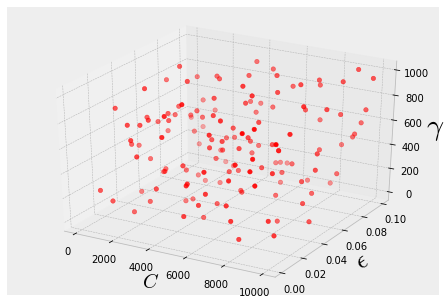





Best value iteration # 0 = 0.031295

Best value iteration # 1 = 0.027736

Best value iteration # 2 = 0.026026

Best value iteration # 3 = 0.025685

Best value iteration # 4 = 0.025408

Best value iteration # 5 = 0.025325

Best value iteration # 6 = 0.025325

Best value iteration # 7 = 0.025325

Best value iteration # 8 = 0.025325

Best value iteration # 9 = 0.025325

Best value iteration # 10 = 0.025321

Best value iteration # 11 = 0.025308

Best value iteration # 12 = 0.025298

Best value iteration # 13 = 0.025298

Best value iteration # 14 = 0.025298

Best value iteration # 15 = 0.025286

Best value iteration # 16 = 0.025286

Best value iteration # 17 = 0.025286

Best value iteration # 18 = 0.025278

Best value iteration # 19 = 0.025278

Best value iteration # 20 = 0.025278

Best value iteration # 21 = 0.025278

Best value iteration # 22 = 0.025278

Best value iteration # 23 = 0.025278

Best value iteration # 24 = 0.025278

Best value iteration # 25 = 0.025278

Best value iterati

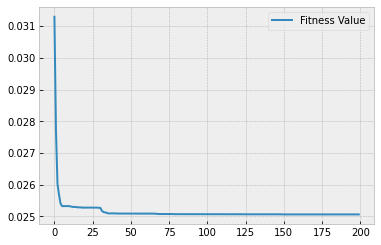

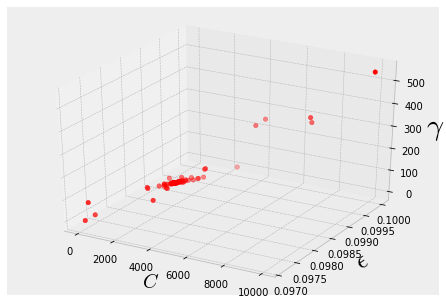





Predictions with the Population Best Value found:



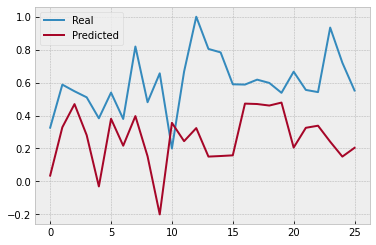





Mean Squared Error for the Test Set:	 0.169946




Predictions Average:	 0.259829




Predictions Median:	 0.262209






In [61]:
pso(150, 200, 3, 0.01) #

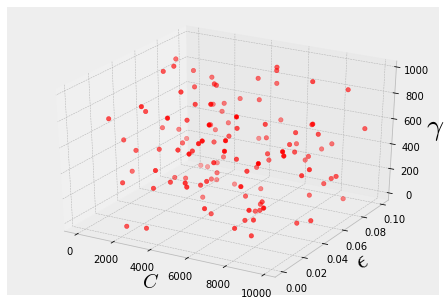





Best value iteration # 0 = 0.026762

Best value iteration # 1 = 0.025853

Best value iteration # 2 = 0.025823

Best value iteration # 3 = 0.025461

Best value iteration # 4 = 0.025461

Best value iteration # 5 = 0.025461

Best value iteration # 6 = 0.025404

Best value iteration # 7 = 0.025182

Best value iteration # 8 = 0.025087

Best value iteration # 9 = 0.025087

Best value iteration # 10 = 0.025087

Best value iteration # 11 = 0.024557

Best value iteration # 12 = 0.024300

Best value iteration # 13 = 0.024238

Best value iteration # 14 = 0.024066

Best value iteration # 15 = 0.024066

Best value iteration # 16 = 0.024066

Best value iteration # 17 = 0.024022

Best value iteration # 18 = 0.024022

Best value iteration # 19 = 0.024010

Best value iteration # 20 = 0.024000

Best value iteration # 21 = 0.024000

Best value iteration # 22 = 0.023780

Best value iteration # 23 = 0.023780

Best value iteration # 24 = 0.023750

Best value iteration # 25 = 0.023750

Best value iterati

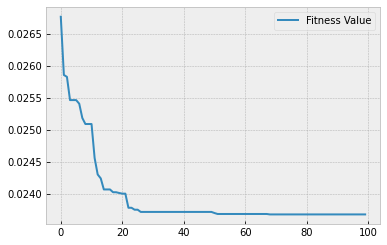

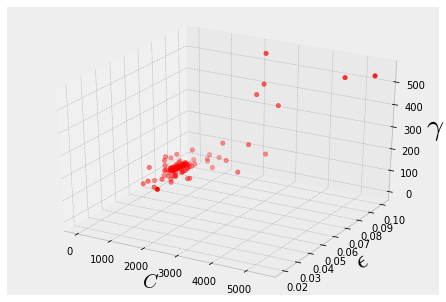





Predictions with the Population Best Value found:



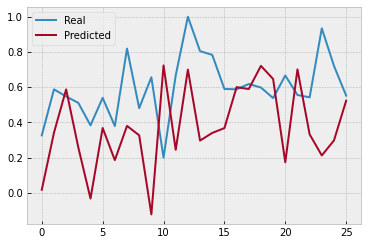





Mean Squared Error for the Test Set:	 0.129664




Predictions Average:	 0.375840




Predictions Median:	 0.340437






In [62]:
pso(120, 100, 3, 0.8)

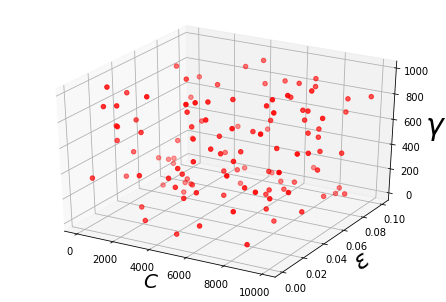





Best value iteration # 0 = 0.031899

Best value iteration # 1 = 0.027867

Best value iteration # 2 = 0.025679

Best value iteration # 3 = 0.025679

Best value iteration # 4 = 0.025679

Best value iteration # 5 = 0.025679

Best value iteration # 6 = 0.025679

Best value iteration # 7 = 0.025679

Best value iteration # 8 = 0.024095

Best value iteration # 9 = 0.024095

Best value iteration # 10 = 0.024095

Best value iteration # 11 = 0.024095

Best value iteration # 12 = 0.024095

Best value iteration # 13 = 0.024038

Best value iteration # 14 = 0.024029

Best value iteration # 15 = 0.023810

Best value iteration # 16 = 0.023810

Best value iteration # 17 = 0.023810

Best value iteration # 18 = 0.023810

Best value iteration # 19 = 0.023810

Best value iteration # 20 = 0.023810

Best value iteration # 21 = 0.023810

Best value iteration # 22 = 0.023809

Best value iteration # 23 = 0.023806

Best value iteration # 24 = 0.023758

Best value iteration # 25 = 0.023758

Best value iterati

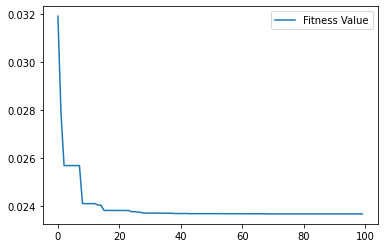

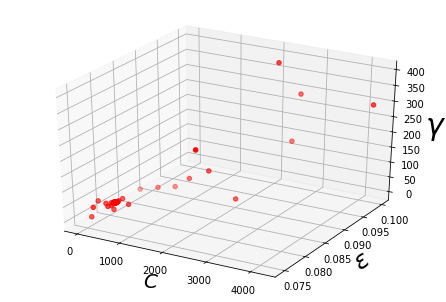





Predictions with the Population Best Value found:



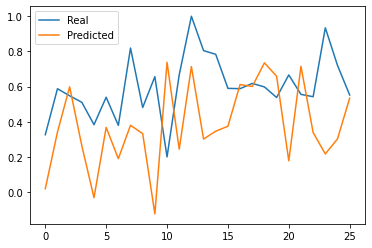





Mean Squared Error for the Test Set:	 0.129001




Predictions Average:	 0.382241




Predictions Median:	 0.343531






In [ ]:
pso(120, 100, 3, 0.6)

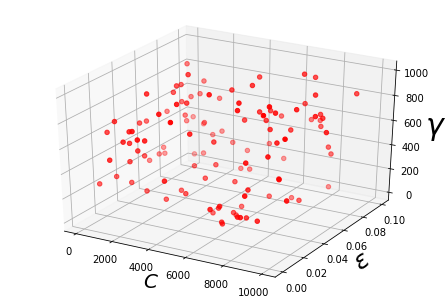





Best value iteration # 0 = 0.029462

Best value iteration # 1 = 0.026418

Best value iteration # 2 = 0.025979

Best value iteration # 3 = 0.025588

Best value iteration # 4 = 0.025505

Best value iteration # 5 = 0.025505

Best value iteration # 6 = 0.025488

Best value iteration # 7 = 0.025462

Best value iteration # 8 = 0.025462

Best value iteration # 9 = 0.025455

Best value iteration # 10 = 0.025452

Best value iteration # 11 = 0.025452

Best value iteration # 12 = 0.025446

Best value iteration # 13 = 0.025446

Best value iteration # 14 = 0.025446

Best value iteration # 15 = 0.025446

Best value iteration # 16 = 0.025446

Best value iteration # 17 = 0.025446

Best value iteration # 18 = 0.025446

Best value iteration # 19 = 0.025446

Best value iteration # 20 = 0.025442

Best value iteration # 21 = 0.025442

Best value iteration # 22 = 0.025442

Best value iteration # 23 = 0.025427

Best value iteration # 24 = 0.025427

Best value iteration # 25 = 0.025427

Best value iterati

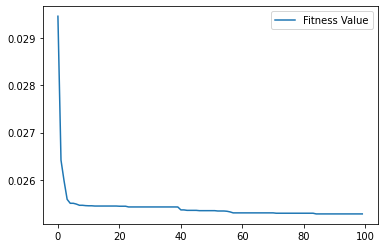

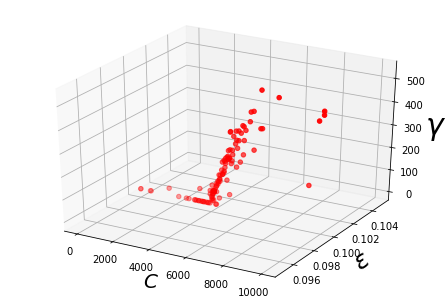





Predictions with the Population Best Value found:



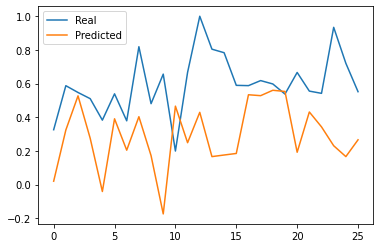





Mean Squared Error for the Test Set:	 0.157472




Predictions Average:	 0.291575




Predictions Median:	 0.270720






In [ ]:
pso(120, 100, 3, 0.2)